This project contains a 10-year weather dataset of a town in Hungary, we will analyse it.

In [1]:
#installing packages
install.packages('corrplot')
install.packages("ggplot2")
install.packages('DAAG')
install.packages('car')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘praise’, ‘rlang’, ‘testthat’, ‘isoband’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
#loading packages
library(corrplot)
library(ggplot2)
library(DAAG)
library(car)

corrplot 0.84 loaded
Loading required package: lattice
Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:DAAG’:

    vif



### About the Dataset:

we have following parameters in this dataset:
1. Formatted.Date
2. Summary
3. Precip.Type
4. Temperature..C.
5. Apparent.Temperature..C.
6. Humidity
7. Wind.Speed..km.h. 
8. Wind.Bearing..degrees.
9. Visibility..km. 
10. Loud.Cover 
11. Pressure..millibars. 
12. Daily.Summary  

In [3]:
# loading data

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

library("aws.s3")
obj <- get_object(
    object = "weatherHistory.csv",
    bucket = "exploratorydataanalysisonweatherd-donotdelete-pr-2xcymlbfxdgxvq",
    key = "09de840463fc4a4d93d05e8270866540",
    secret = "4bcc755ef0c12f5d881a3f6031d9ba9b117df21c0f9b6f58",
    check_region = FALSE,
    base_url = "s3.eu-geo.objectstorage.service.networklayer.com")

df <- read.csv(text = rawToChar(obj))
head(df)


Formatted.Date                Summary       Precip.Type Temperature..C.
1 2006-04-01 00:00:00.000 +0200 Partly Cloudy rain        9.472222       
2 2006-04-01 01:00:00.000 +0200 Partly Cloudy rain        9.355556       
3 2006-04-01 02:00:00.000 +0200 Mostly Cloudy rain        9.377778       
4 2006-04-01 03:00:00.000 +0200 Partly Cloudy rain        8.288889       
5 2006-04-01 04:00:00.000 +0200 Mostly Cloudy rain        8.755556       
6 2006-04-01 05:00:00.000 +0200 Partly Cloudy rain        9.222222       
  Apparent.Temperature..C. Humidity Wind.Speed..km.h. Wind.Bearing..degrees.
1 7.388889                 0.89     14.1197           251                   
2 7.227778                 0.86     14.2646           259                   
3 9.377778                 0.89      3.9284           204                   
4 5.944444                 0.83     14.1036           269                   
5 6.977778                 0.83     11.0446           259                   
6 7.111111                 0.85     13.9587           258                   
  Visibility..km. Loud.Cover Pressure..millibars.
1 15.8263         0          1015.13             
2 15.8263         0          1015.63             
3 14.9569         0          1015.94             
4 15.8263         0          1016.41             
5 15.8263         0          1016.51             
6 14.9569         0          1016.66             
  Daily.Summary                    
1 Partly cloudy throughout the day.
2 Partly cloudy throughout the day.
3 Partly cloudy throughout the day.
4 Partly cloudy throughout the day.
5 Partly cloudy throughout the day.
6 Partly cloudy throughout the day.

In [4]:
#Structure and summary of data
str(df)

'data.frame':	96453 obs. of  12 variables:
 $ Formatted.Date          : Factor w/ 96429 levels "2006-01-01 00:00:00.000 +0100",..: 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 ...
 $ Summary                 : Factor w/ 27 levels "Breezy","Breezy and Dry",..: 20 20 18 20 18 20 20 20 20 20 ...
 $ Precip.Type             : Factor w/ 3 levels "null","rain",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Temperature..C.         : num  9.47 9.36 9.38 8.29 8.76 ...
 $ Apparent.Temperature..C.: num  7.39 7.23 9.38 5.94 6.98 ...
 $ Humidity                : num  0.89 0.86 0.89 0.83 0.83 0.85 0.95 0.89 0.82 0.72 ...
 $ Wind.Speed..km.h.       : num  14.12 14.26 3.93 14.1 11.04 ...
 $ Wind.Bearing..degrees.  : num  251 259 204 269 259 258 259 260 259 279 ...
 $ Visibility..km.         : num  15.8 15.8 15 15.8 15.8 ...
 $ Loud.Cover              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressure..millibars.    : num  1015 1016 1016 1016 1017 ...
 $ Daily.Summary           : Factor w/ 214 levels "Breezy and foggy star

In [5]:
summary(df)

                       Formatted.Date                 Summary      Precip.Type 
 2010-08-02 00:00:00.000 +0200:    2   Partly Cloudy      :31733   null:  517  
 2010-08-02 01:00:00.000 +0200:    2   Mostly Cloudy      :28094   rain:85224  
 2010-08-02 02:00:00.000 +0200:    2   Overcast           :16597   snow:10712  
 2010-08-02 03:00:00.000 +0200:    2   Clear              :10890               
 2010-08-02 04:00:00.000 +0200:    2   Foggy              : 7148               
 2010-08-02 05:00:00.000 +0200:    2   Breezy and Overcast:  528               
 (Other)                      :96441   (Other)            : 1463               
 Temperature..C.   Apparent.Temperature..C.    Humidity      Wind.Speed..km.h.
 Min.   :-21.822   Min.   :-27.717          Min.   :0.0000   Min.   : 0.000   
 1st Qu.:  4.689   1st Qu.:  2.311          1st Qu.:0.6000   1st Qu.: 5.828   
 Median : 12.000   Median : 12.000          Median :0.7800   Median : 9.966   
 Mean   : 11.933   Mean   : 10.855          

In [6]:
#drop NA values
df= na.omit(df)

We will use corelation to find out the relation between fields in data.

In [7]:
correl <- cor(df[c(4,5,6,7,8,9,11)])
correl

Temperature..C. Apparent.Temperature..C. Humidity     
Temperature..C.           1.000000000     0.9926285642            -0.6322546750
Apparent.Temperature..C.  0.992628564     1.0000000000            -0.6025709956
Humidity                 -0.632254675    -0.6025709956             1.0000000000
Wind.Speed..km.h.         0.008956968    -0.0566496983            -0.2249514559
Wind.Bearing..degrees.    0.029988204     0.0290305198             0.0007346454
Visibility..km.           0.392846572     0.3817184705            -0.3691725006
Pressure..millibars.     -0.005447106    -0.0002189998             0.0054542633
                         Wind.Speed..km.h. Wind.Bearing..degrees.
Temperature..C.           0.008956968       0.0299882045         
Apparent.Temperature..C. -0.056649698       0.0290305198         
Humidity                 -0.224951456       0.0007346454         
Wind.Speed..km.h.         1.000000000       0.1038215077         
Wind.Bearing..degrees.    0.103821508       1.0000000000         
Visibility..km.           0.100749284       0.0475941753         
Pressure..millibars.     -0.049262806      -0.0116508848         
                         Visibility..km. Pressure..millibars.
Temperature..C.           0.39284657     -0.0054471062       
Apparent.Temperature..C.  0.38171847     -0.0002189998       
Humidity                 -0.36917250      0.0054542633       
Wind.Speed..km.h.         0.10074928     -0.0492628055       
Wind.Bearing..degrees.    0.04759418     -0.0116508848       
Visibility..km.           1.00000000      0.0598183810       
Pressure..millibars.      0.05981838      1.0000000000

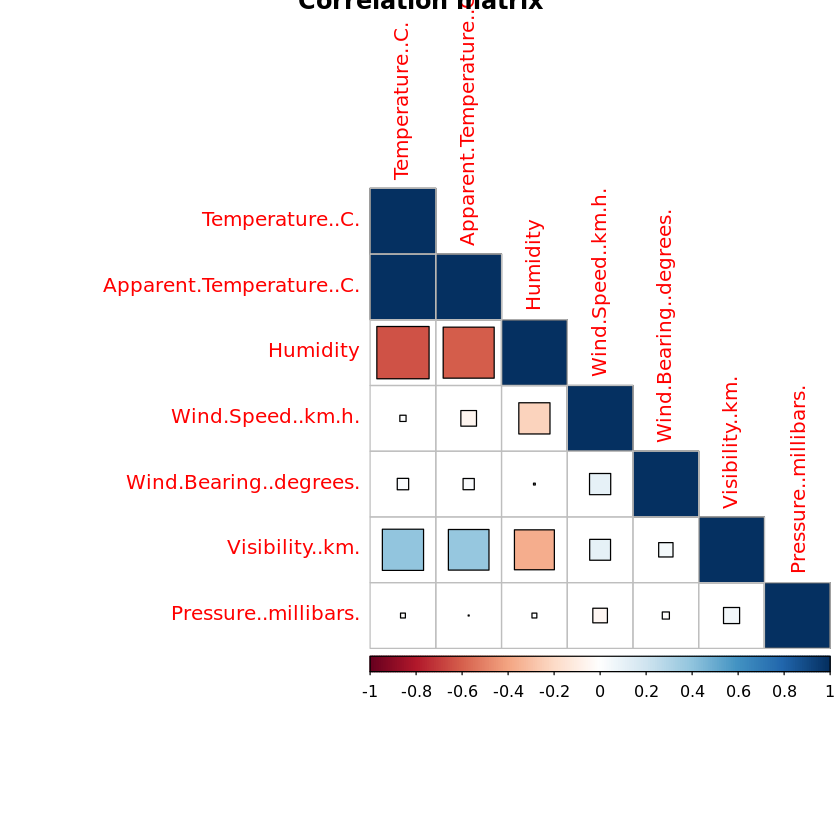

In [8]:
corrplot(correl, type="lower",outline = T, method = 'square',title = 'Correlation matrix')

From observation of correlation, we can clearly see that Temperature and humidity have a correlation of -0.63, we will analyse this relation.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


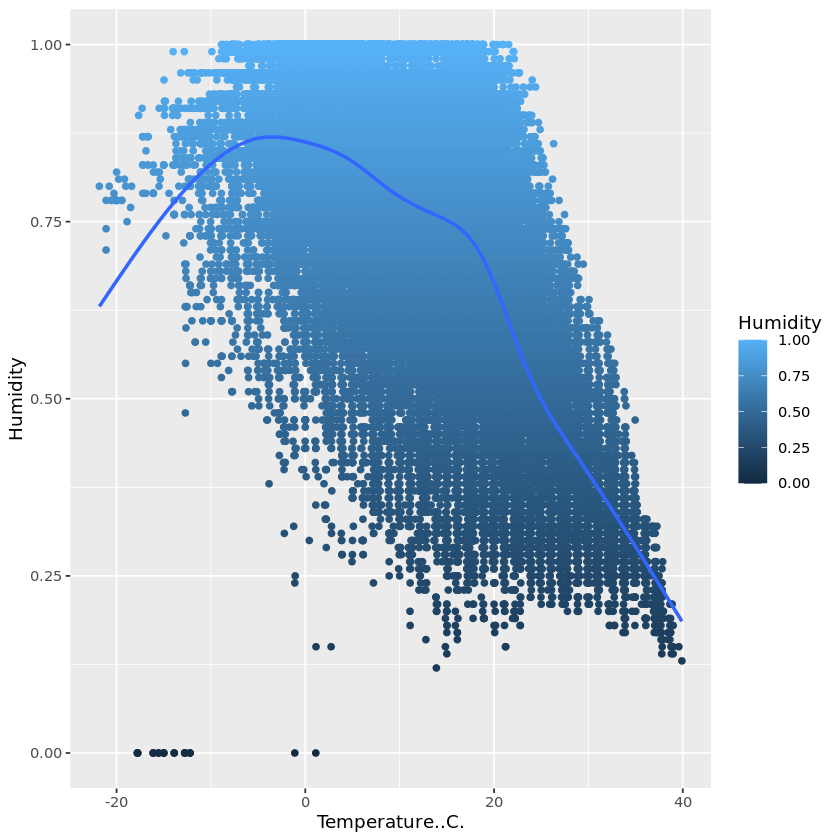

In [9]:
ggplot(data= df,aes(x=Temperature..C.,y=Humidity, col=Humidity))+
  geom_point()+
  geom_smooth(fill = NA)

We can understand Temperature and Humidity relationship by splitiing up humidity in several groups.

In [10]:
df$HumidityRange <- cut(df$Humidity, breaks = seq(0,1,0.2), labels =c("less than 0.2" , "0.2-0.4" , "0.4-0.6" , "0.6-0.8" , "0.8-1.0"))

Naw we plot a boxplot to get deep insight of Humidity with respect to temperature.

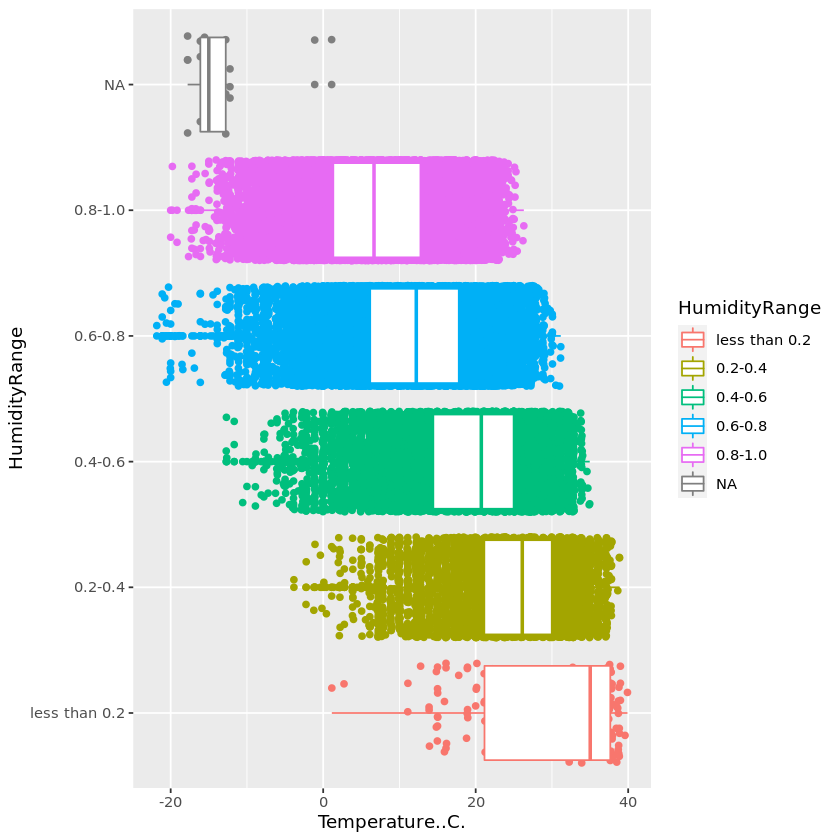

In [11]:
ggplot(data= df,aes(x=Temperature..C.,y=HumidityRange, col=HumidityRange))+
  geom_jitter()+
  geom_boxplot()


Let us create a linear regression model for humidity based upon several factors such as Temperature and Wind Speed.

In [12]:
# models

fit= lm(Humidity~Temperature..C. + Visibility..km. + Wind.Speed..km.h. + Wind.Bearing..degrees., data = df)
summary(fit)



Call:
lm(formula = Humidity ~ Temperature..C. + Visibility..km. + Wind.Speed..km.h. + 
    Wind.Bearing..degrees., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18960 -0.09450  0.01117  0.10152  0.39398 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             9.849e-01  1.546e-03  636.92   <2e-16 ***
Temperature..C.        -1.196e-02  5.261e-05 -227.36   <2e-16 ***
Visibility..km.        -5.613e-03  1.205e-04  -46.58   <2e-16 ***
Wind.Speed..km.h.      -6.004e-03  6.751e-05  -88.94   <2e-16 ***
Wind.Bearing..degrees.  8.381e-05  4.327e-06   19.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1434 on 96448 degrees of freedom
Multiple R-squared:  0.4618,	Adjusted R-squared:  0.4617 
F-statistic: 2.069e+04 on 4 and 96448 DF,  p-value: < 2.2e-16


In [13]:

coef = coefficients(fit)
coef


(Intercept)        Temperature..C.        Visibility..km. 
          0.9848965399          -0.0119607122          -0.0056126791 
     Wind.Speed..km.h. Wind.Bearing..degrees. 
         -0.0060044784           0.0000838051

Let's plot Residual values vs fitted values

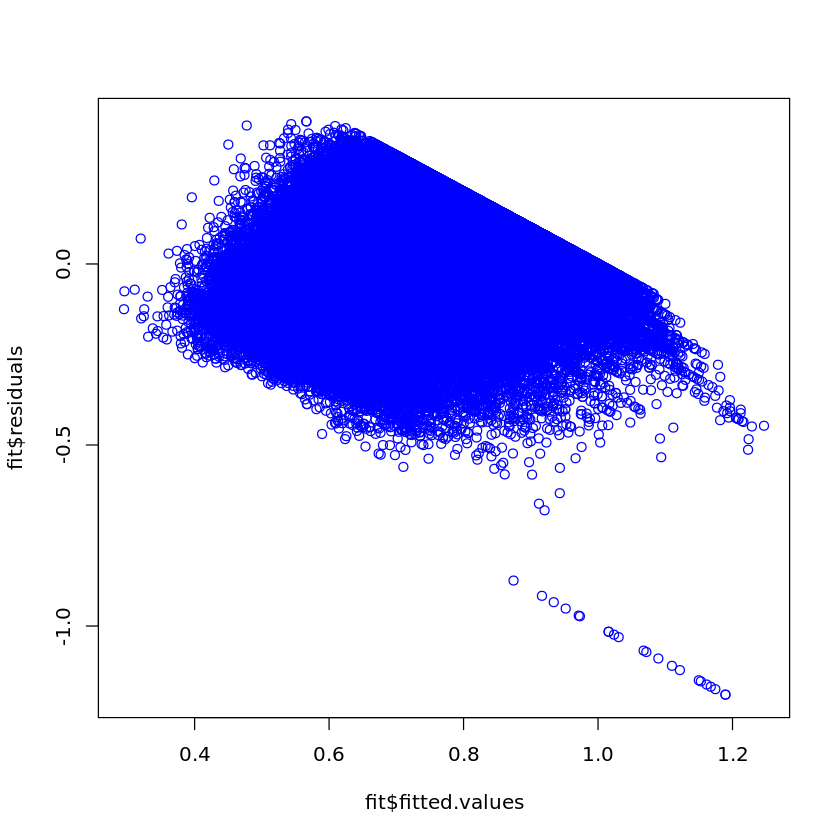

In [14]:
plot(fit$residuals~fit$fitted.values, data= df, col= "blue")

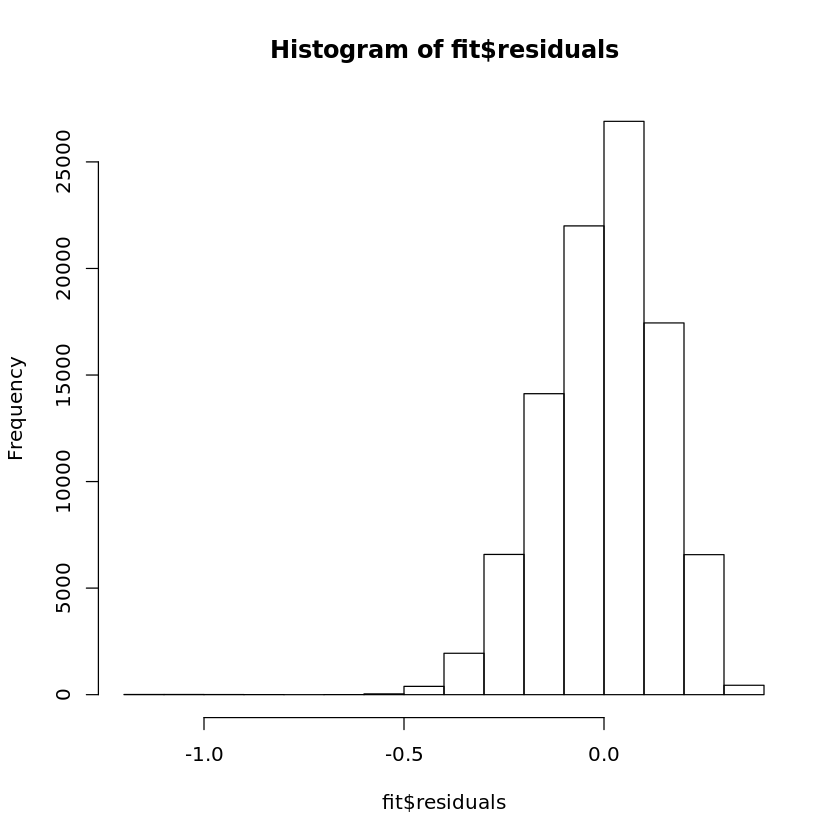

In [15]:
#Normality test
hist(fit$residuals)

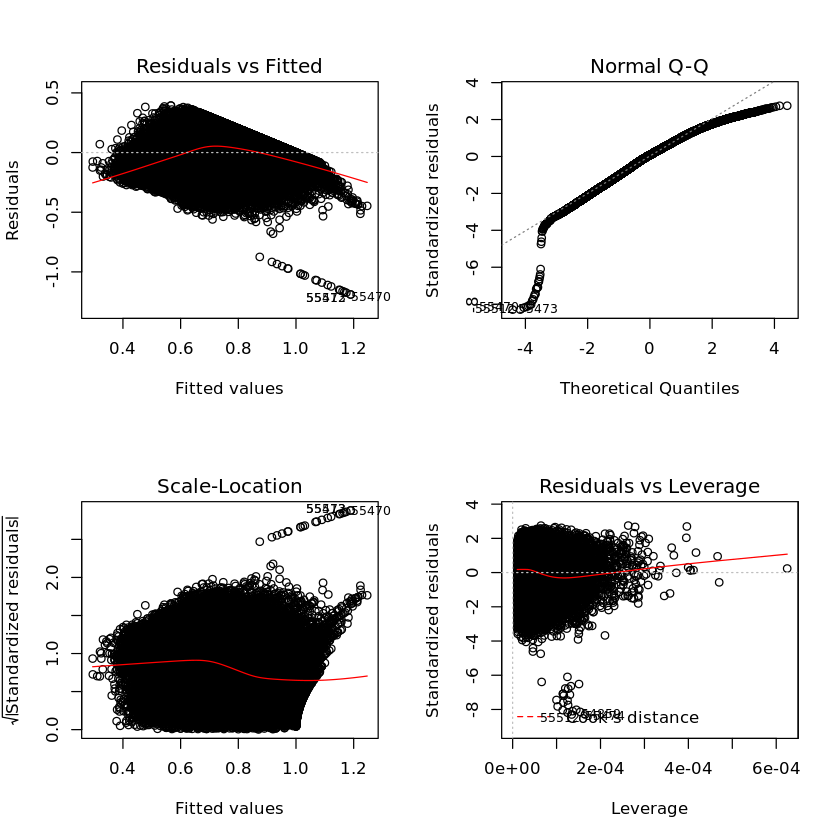

In [16]:
par(mfrow= c(2,2))
plot(fit)

In [17]:
#Multicollinearity test

In [18]:
vif(fit) #variance inflation factors

Temperature..C.        Visibility..km.      Wind.Speed..km.h. 
              1.184111               1.196822               1.021628 
Wind.Bearing..degrees. 
              1.012572

Analysis of Variance Table

Response: Humidity
                          Df Sum Sq Mean Sq F value Pr(>F)    
Temperature..C.            1   1473    1473   71631 <2e-16 ***
Visibility..km.            1     64      64    3092 <2e-16 ***
Wind.Speed..km.h.          1    157     157    7646 <2e-16 ***
Wind.Bearing..degrees.     1      8       8     375 <2e-16 ***
Residuals              96448   1984       0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Warning message in cv.lm(data = df, fit, m = 4):
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”


fold 1 
Observations in test set: 24113 
                1      5     7     8      24     31     33      48   54    55
Predicted   0.719 0.7467 0.784 0.761 0.76810 0.8080 0.7416  0.6454 0.77 0.758
cvpred      0.719 0.7469 0.784 0.761 0.76834 0.8077 0.7416  0.6458 0.77 0.758
Humidity    0.890 0.8300 0.950 0.890 0.77000 0.8500 0.7800  0.5900 0.95 0.930
CV residual 0.171 0.0831 0.166 0.129 0.00166 0.0423 0.0384 -0.0558 0.18 0.172
                57    67     89      93      98     99     105     106     108
Predicted   0.7295 0.731 0.6745  0.7393  0.7923 0.8577  0.7784  0.7461  0.7804
cvpred      0.7296 0.731 0.6745  0.7392  0.7925 0.8575  0.7782  0.7459  0.7803
Humidity    0.8200 0.860 0.7600  0.6600  0.7500 0.8800  0.7600  0.7100  0.7200
CV residual 0.0904 0.129 0.0855 -0.0792 -0.0425 0.0225 -0.0182 -0.0359 -0.0603
                109    112     115    124    125    132    136    138     140
Predicted    0.7956  0.839  0.7719 0.8475 0.8653  0.667  0.661  0.627  0.7135
cvpred       0.79

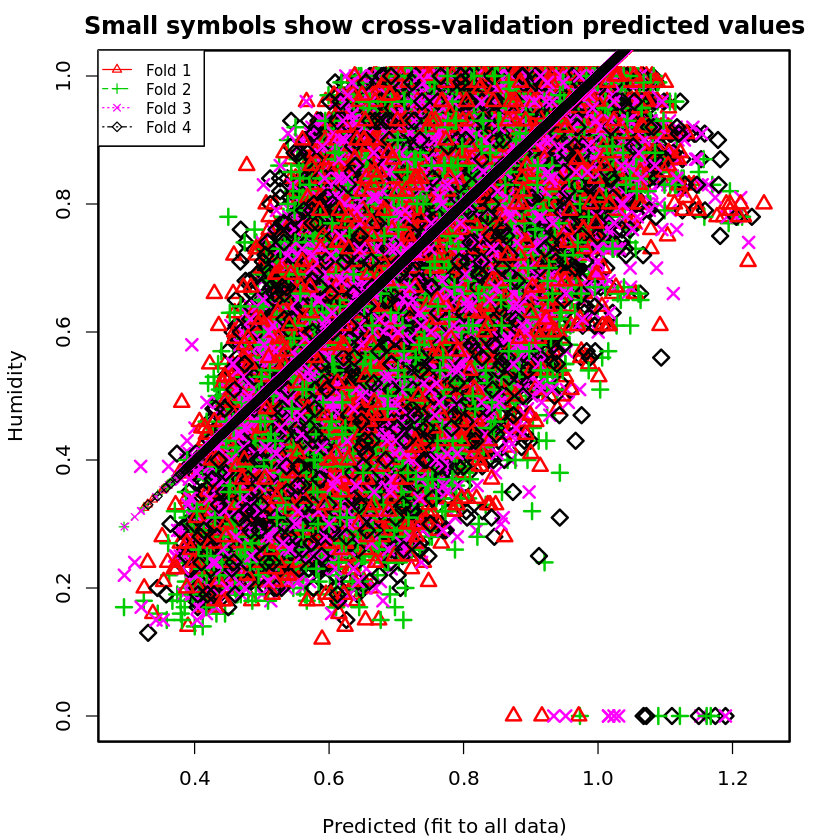

In [27]:
#K-fold cross validation
cv.lm(data = df, fit, m= 4)

Throughout this analysis of the weather data, we have created regression models which can be used for weather forecasting. We have also studied relationship between Temperature and Humidity.